In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_tasks = 40
head_hid_pairs = [(12, 384), (12, 24), (2, 24), (2, 384)]
lr_range = torch.linspace(np.log(3e-5), np.log(3e-3), steps=10).exp()

#lr = lr_range[task_id % 10]
#num_head, hid_dim = head_hid_pairs[task_id // 10]

num_steps = 500 # pretraining
num_epochs = 10 # fine tuning
eval_interval = 100
data = torch.load('../outputs/exp-1-0.pt', weights_only=False)
train_losses = torch.zeros(len(head_hid_pairs), len(lr_range), len(data['train_losses']))
eval_losses = torch.zeros(len(head_hid_pairs), len(lr_range), len(data['eval_losses']))

for task_id in range(num_tasks):
    data = torch.load(f'../outputs/exp-1-{task_id}.pt', weights_only=False)
    train_losses[task_id // 10, task_id % 10] = torch.tensor(data['train_losses'])
    eval_losses[task_id // 10, task_id % 10] = torch.tensor(data['eval_losses'])

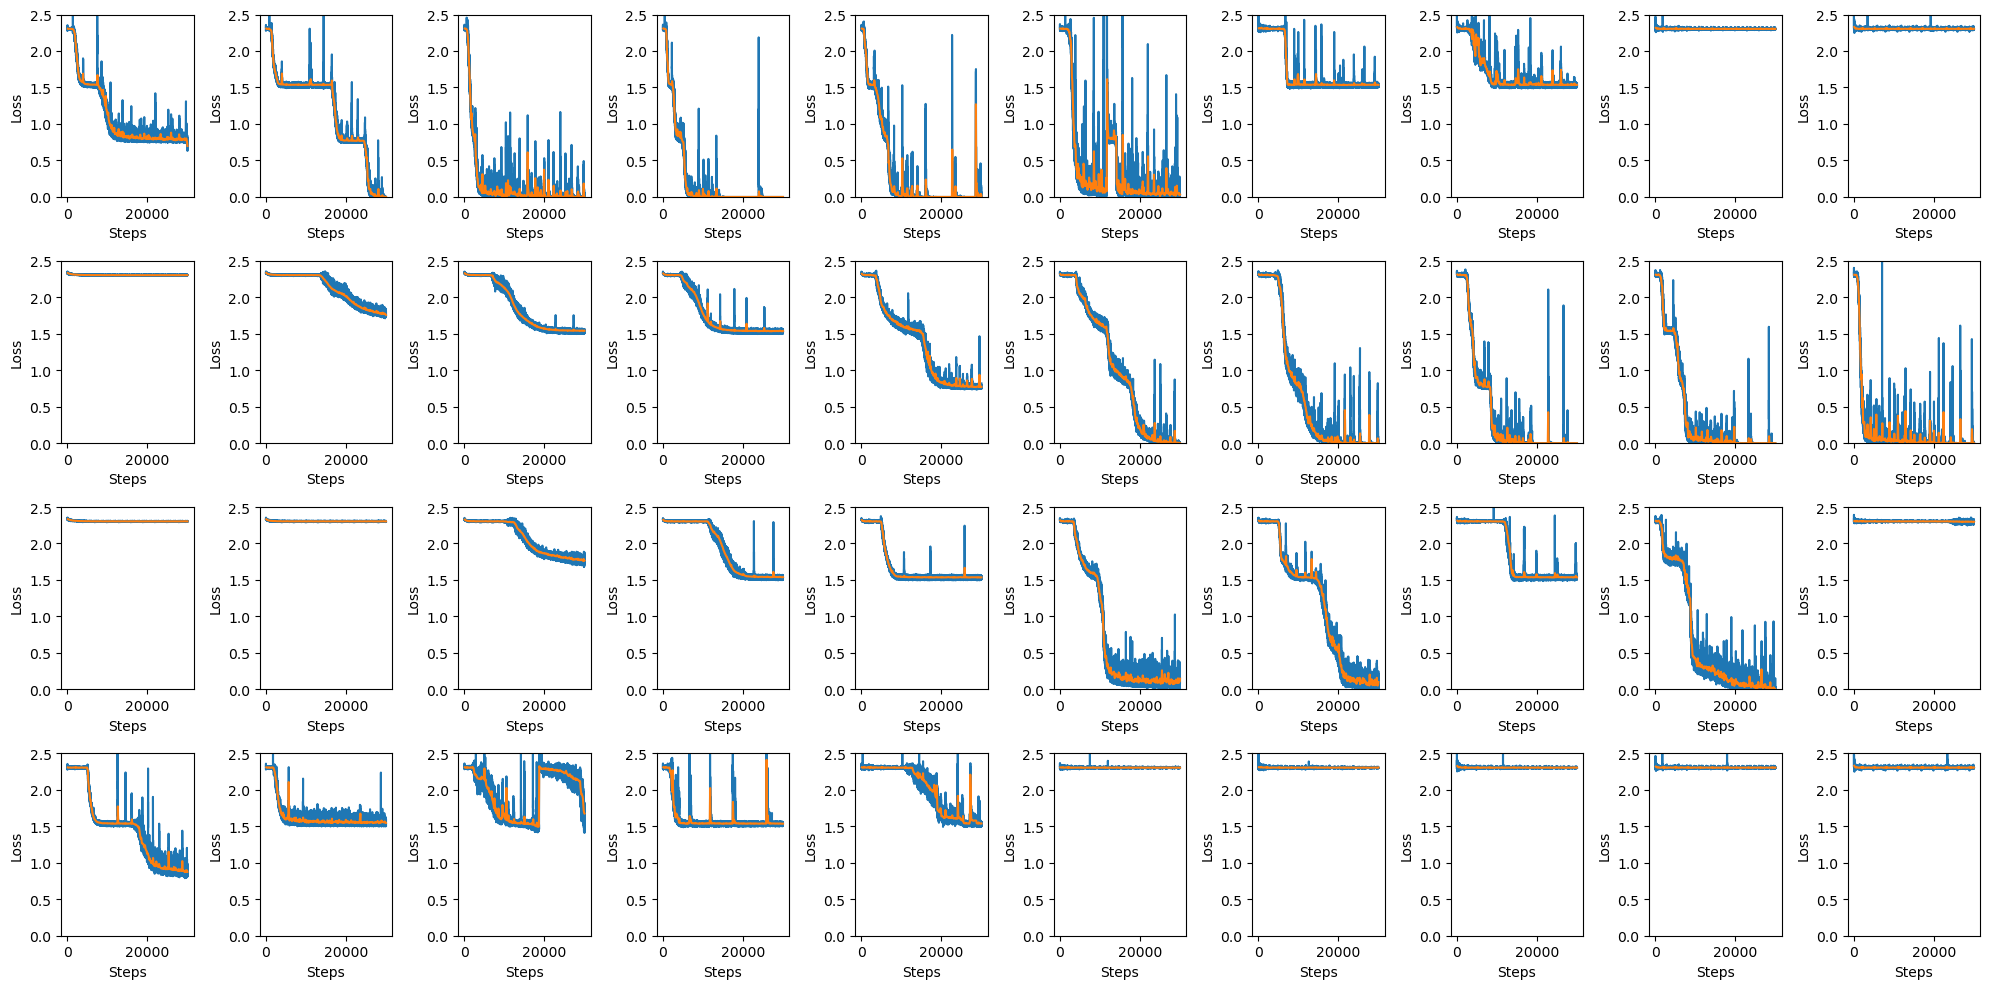

In [ ]:
# 4 by 10 subplots
fig, axs = plt.subplots(4, 10, figsize=(20, 10))
for i, (num_head, hid_dim) in enumerate(head_hid_pairs):
    for j, lr in enumerate(lr_range):
        ax = axs[i, j]
        ax.plot(range(1, train_losses.shape[2] + 1),train_losses[i, j].numpy())
        ax.plot(torch.arange(1, eval_losses.shape[2] + 1) * eval_interval, eval_losses[i, j].numpy())
        #ax.set_title(f'Heads: {num_head}, Hid: {hid_dim}, LR: {lr:.1e}')
        ax.set_xlabel('Steps')
        ax.set_ylabel('Loss')
        ax.set_ylim(0, 2.5)
plt.tight_layout()

Text(0, 0.5, 'Eval Loss')

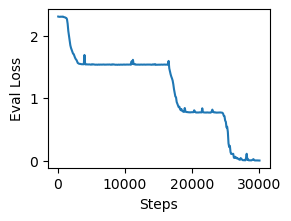

In [7]:
plt.figure(figsize=(2.8, 2.1), constrained_layout=True)
plt.plot(torch.arange(1, eval_losses.shape[2] + 1) * eval_interval, eval_losses[0, 1].numpy())
plt.xlabel('Steps')
plt.ylabel('Eval Loss')

In [14]:
head_dim = [hid_dim // num_head for num_head, hid_dim in head_hid_pairs]

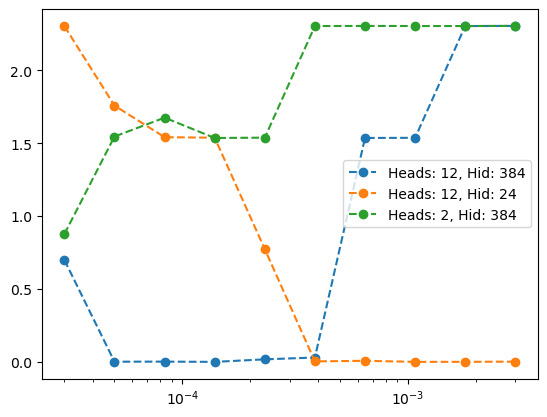

In [22]:
for i, (num_head, hid_dim) in enumerate(head_hid_pairs):
    if i != 2:
        plt.plot(lr_range.numpy(), eval_losses[i, :, -1].numpy(), 'o--', label=f'Heads: {num_head}, Hid: {hid_dim}')
plt.xscale('log')
#plt.yscale('log')
plt.legend()

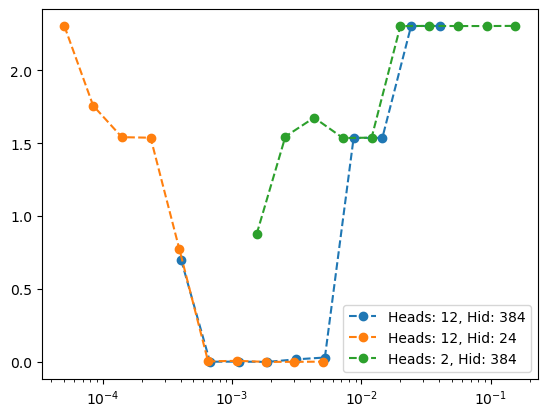

In [28]:
for i, (num_head, hid_dim) in enumerate(head_hid_pairs):
    if i != 2:
        plt.plot(lr_range.numpy() * head_dim[i] ** 0.75, eval_losses[i, :, -1].numpy(), 'o--', label=f'Heads: {num_head}, Hid: {hid_dim}')
plt.xscale('log')
#plt.yscale('log')
plt.legend()